
# Intro to Plotting with Matplotlib

Today we're going to take our first steps into the wide world of plotting in Python using the Matplotlib library. This is the most used plotting package and the basis of many other popular visualization packages.

## Learning Objective

The goal of data visualization is to learn and communicate insights about a dataset, in the initial examples we will use simple functions y=F(x) as the basis for our charts before moving onto working with more complex sample datasets.
At the end of this notebook you will be able to:

*    Import the required libraries into a notebook
*    Understand the differences of working with Matplotlib in notebooks versus in scripts
*    Create plots based on simple datasets
*    Create structures containing multiple charts
*    Understand how to work with matplotlib objects
*    Resize and add titles to figures and charts
*    Modify the elements of a chart such as the axis, line type and color
*    Create one chart with multiple lines on two different Y-axis

### Import Matplotlib

In [1]:
import matplotlib.pyplot as plt # Imports the plotting interface and creates the common alias 'plt'
import numpy as np # we will use numpy to generate the data used in our sample charts

### Understand your coding environment
Matplotlib can be used to create charts in many contexts, and it is important to write your code depending on how and where it will be run.
When working with matplotlib in a script that will be run as a .py file, the function `plt.show()` needs to be executed to render any chart that has been created in the script.

Here, we are working in a Jupyter notebook environment so the `plt.show()` function is **not necessary**.  
To let you know:  
With older version of Jupyter notebooks, there may be the need to tell our machine to render the images below our code or 'inline'.  
We use the magic function `%matplotlib inline` to have the charts displayed in the notebook.  
Anyways, executing the following 'line magic' keeps you on the safe side!

In [2]:
%matplotlib inline

### First Plot!
We will create some x and y values and display this in a simple chart

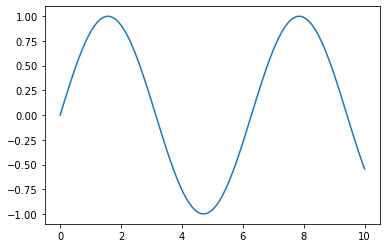

In [3]:
x = np.linspace(0, 10, 100) # create an array of numbers to use as our x values
y = np.sin(x) # generates corresponding y values based on the sin function
fig = plt.figure() # initializes the figure, which is the container holding the chart elements
plt.plot(x, y) # plots the points based on the values for x and y

We can plot additional curves on the same plot by calling the plt.plot method multiple times in a single code block
We can also suppress the output of the python output `[<matplotlib.lines.Line2D at 0x7fdb5779b550>]`by using a ';' at the end of the code block, which results in a cleaner display.

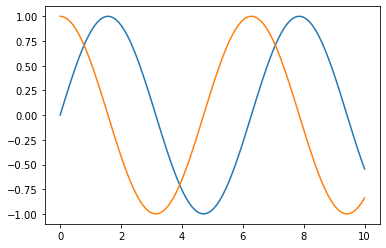

In [4]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Notice matplotlib automatically sets different colors for the lines. The default values for color choice as well as general chart properties can be set explicitly using the style tool.
When we tell matplotlib to use the 'fivethirtyeight' style all subsequent plots will take on new default characteristics (based on the style of Nate Silvers' website).

In [5]:
plt.style.use('fivethirtyeight')

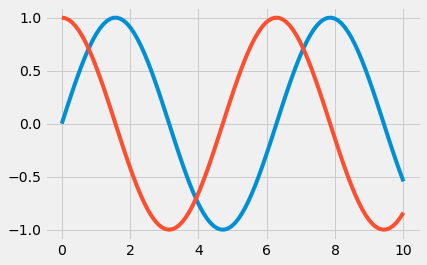

In [6]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Again, see [here](https://matplotlib.org/2.0.2/examples/style_sheets/style_sheets_reference.html) for more details on styles  
or run this code to get a list of what is available:

`plt.style.available`


Notice that changing the style this way affects all subsequent plots.
It is possible to temporarily evoke a style:   


`with plt.style.context('stylename'):
    make_a_plot()`


### Building Figures and Axes
Up to know we have plotted two lines a single chart in a frame. The power of Matplotlib comes from being able to display multiple charts in a frame. There are two ways to do this and understanding which one you are using is key to being able to interact nicely with the objects you create.

### Interface 1: MATLAB-style
Matplotlib was built as a open source alternative for MATLAB (sounds similar rolling off the tongue somehow). In this interface the 'plt' contains all the tools for manipulating the charts.

Create two panels in a figure:

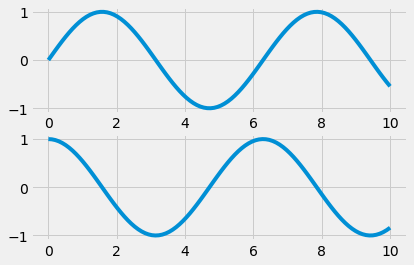

In [7]:
plt.figure()  # create the frame that will hold the subsequently generated panels where the charts will live.

# creates structure of subplots in the figure in configuration 2 rows x 1 column, and 'activate panel number 1
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x)) # plots the line on the activated panel

# activates panel number 2
plt.subplot(2, 1, 2)  
plt.plot(x, np.cos(x));

We can make additional columns and populate the frames similarly. We can also change the size of the figure to allow more space for our charts and add individual titles.

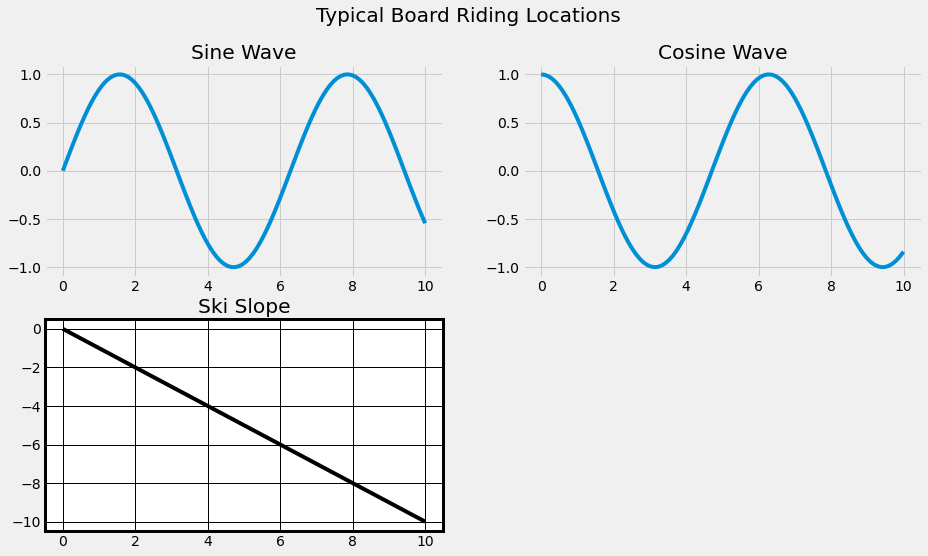

In [8]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(14,8))  # figsize=(float, float) : Width, height in inches
plt.suptitle('Typical Board Riding Locations', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))
plt.title('Sine Wave') # add a title to the subplot

plt.subplot(2, 2, 2)  
plt.plot(x, np.cos(x))
plt.title('Cosine Wave')

with plt.style.context('grayscale'): #using a different style for this subplot
    plt.subplot(2, 2, 3)  
    plt.plot(x, -1*x)
    plt.title('Ski Slope');

Each time you activate the panel, any subsequent code will affect this chart. One drawback with the MATLAB style interface is that it is inconvenient to reactivate the first panel.

### Object-oriented Interface

This alternative interface is for more complex frames where you will work with a number of charts and want to interact with each one independently.
Each chart is then a panel object that can be worked on with the built in methods. 
The panels or axes are contained within the array 'ax' and can be called using positional referencing i.e. `ax[0]` for the 1st axes or `ax[1,3]` for the panel in the 2nd row and 4th column (consider 0 is the 1st position)

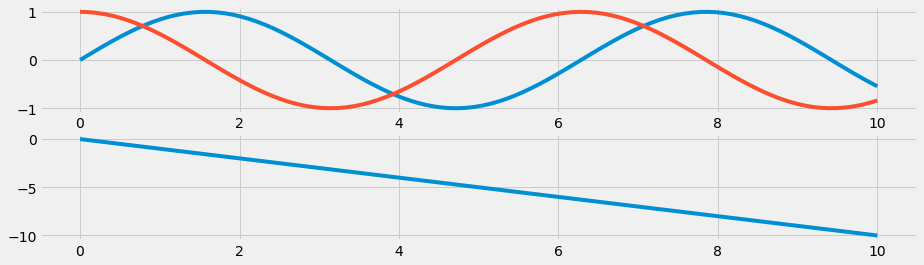

In [9]:

x = np.linspace(0, 10, 100)
# Create a grid of plots
# ax will be a 1 dimentional array of two Axes objects
fig, ax = plt.subplots(2, figsize=(14,4)) # is equivalent to (2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, -1 * x)
ax[0].plot(x, np.cos(x)); # we can easily act on the first axes even after referencing the second.



### Labelling and spacing charts with Object Oriented interface

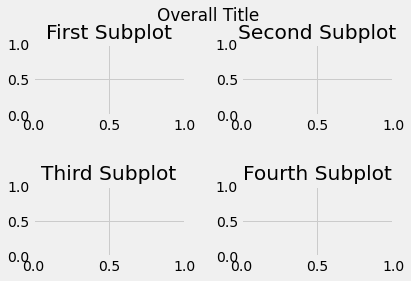

In [10]:
# Set subplots
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=4)

#define subplot titles
ax[0, 0].set_title('First Subplot')
ax[0, 1].set_title('Second Subplot')
ax[1, 0].set_title('Third Subplot')
ax[1, 1].set_title('Fourth Subplot')

#add overall title and adjust it so that it doesn't overlap with subplot titles
fig.suptitle('Overall Title')
plt.subplots_adjust(top=0.85)

### Identifing objects
It can be helpful to ask python to identify the object you are working with using the `type()`function

In [11]:
# Referring to the above set of charts:
print(type(fig))
print(type(ax))
print(type(ax[1,1]))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


The above shows us that fig is a matplotlib figure, `ax` is a numpy array which is holding each axes which are identified as 'AxesSubplot'.

We can keep this in mind when calling the methods on each of the objects.

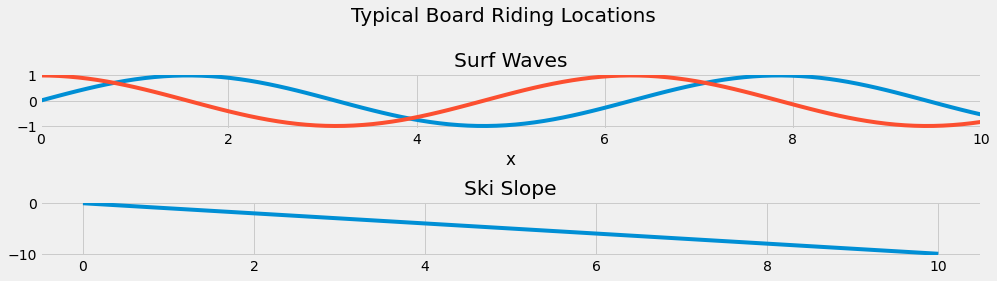

In [12]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots(2, figsize=(14,4)) # is equiveltent to (2,1)
plt.suptitle('Typical Board Riding Locations', fontsize=20)
fig.tight_layout(h_pad=4) # Creates space between axes for subplot titles. Try commenting out to see default behavior
plt.subplots_adjust(top=0.75) # Creates space between figure title and 1st subplot title.

ax[0].plot(x, np.sin(x))
ax[0].plot(x, np.cos(x))
ax[1].plot(x, -1 * x)

ax[0].set_title('Surf Waves')
ax[0].set_xlabel('x')
ax[0].set_xlim(0,10)

ax[1].set_title('Ski Slope');

## Figure, Axes, Axis Labels: Differences between MATLAB and Object-oriented interfaces

In many cases plt functions can be switched to ax methods directly but there are some differences to look out for as seen above.


Same:
```
plt.plot() → ax.plot(), 
plt.legend() → ax.legend()    
```
Different:
```
plt.xlabel() → ax.set_xlabel()
plt.ylabel() → ax.set_ylabel()
plt.xlim() → ax.set_xlim()
plt.ylim() → ax.set_ylim()
plt.title() → ax.set_title()
```

## Playing with Style
As we have seen, when two lines are added to a single chart, Matplotlib draws them in different colors. It is possible to adjust the default set or to manually control this behavior as well as how the lines are drawn with parameters of the plot function (or method).

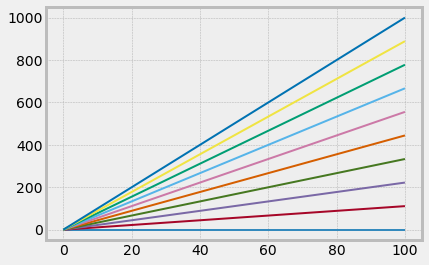

In [13]:
# Draw a plot with lines to see how matplotlib will apply a style automatically
plt.style.use('bmh')
N = 10 # Number of lines to be drawn
x = np.linspace(0, 100, 100) # x values to plot
for n in np.linspace(0, N, N): # Create 10 lines with increasing slope
    plt.plot(x, n * x)


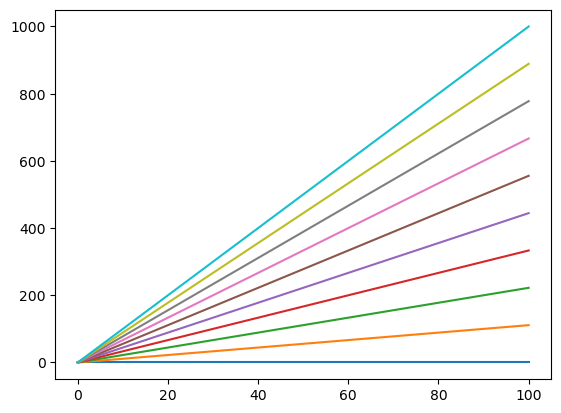

In [14]:
plt.style.use('default')
N = 10
x = np.linspace(0, 100, 100)
for n in np.linspace(0, N, N):
    plt.plot(x, n * x)


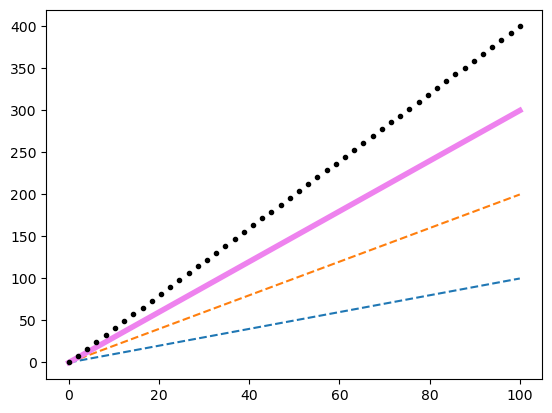

In [15]:
x = np.linspace(0, 100, 50)

plt.plot(x, x, linestyle='dashed') # linestyle can be used to change the line style
plt.plot(x, 2 * x, '--' ) # linestyle can be added quickly using symbols. Try: ('-', '--', '-.', ':')
plt.plot(x, 3 * x, color='violet', linewidth=4) # color can be changed per line by specifying it by name
plt.plot(x, 4 * x, '.k'); # color can be added to the quick specification with letters (rgb & cmyk)


## Additional Chart Elements
We can add axis labels and a legend to ensure easy understanding of contents

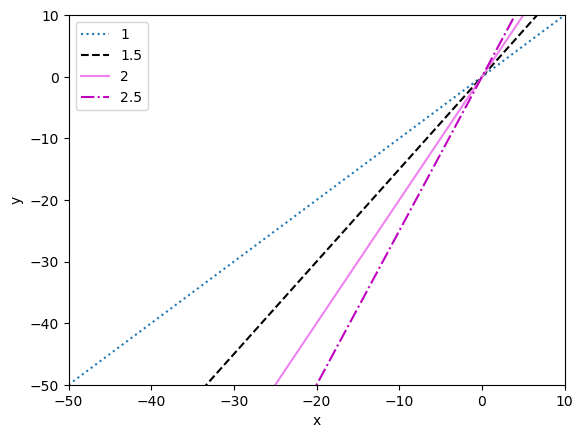

In [16]:
slopes = [1, 1.5, 2 ,2.5]

x = np.linspace(-50, 50, 100)

plt.plot(x, slopes[0] * x, linestyle='dotted')
plt.plot(x, slopes[1] * x, '--k' )
plt.plot(x, slopes[2] * x, color='violet')
plt.plot(x, slopes[3] * x, '-.m')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-50,10)
plt.xlim(-50,10)
plt.legend(slopes);

Alternatively in object oriented interface the set method can be used to adjust many settings at once

<Figure size 640x480 with 0 Axes>

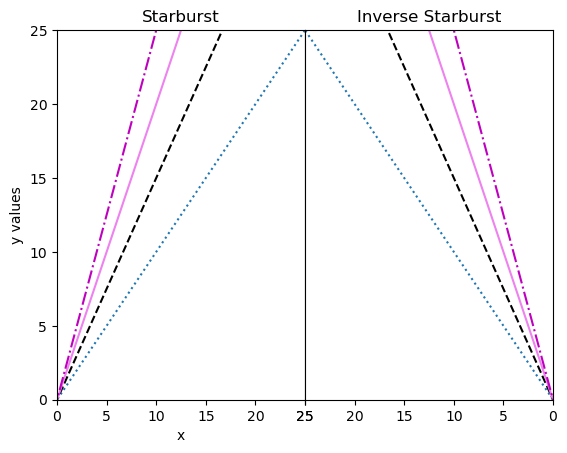

In [17]:
x = np.linspace(-50, 50, 100)
fig = plt.figure()
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0) # changes space between the subplots
ax[0].plot(x, x, linestyle='dotted')
ax[0].plot(x, 1.5 * x, '--k' )
ax[0].plot(x, 2 * x, color='violet')
ax[0].plot(x, 2.5 * x, '-.m'); 
ax[0].set(xlim=(0, 25), ylim=(0, 25),
       xlabel='x', ylabel='y values',
       title='Starburst')
ax[1].plot(x, x, linestyle='dotted')
ax[1].plot(x, 1.5 * x, '--k' )
ax[1].plot(x, 2 * x, color='violet')
ax[1].plot(x, 2.5 * x, '-.m')
ax[1].set(xlim=(25, 0), ylim=(0,25), # notice what happens when xlim values are reveresed
          title='Inverse Starburst')
ax[1].get_yaxis().set_visible(False); # removes y axis from the subplot

### Plot One Chart with Two Different Y-axis
Many times it is great to see how two metrics move together. Lets see how we can put two different series on a single plot sharing the same x axis. This will be very useful in your future projects.
We would like to combine the above two subplots so that we have the sin and cos functions plotted on the left y axis and the straight line plotted on the right y-axis.

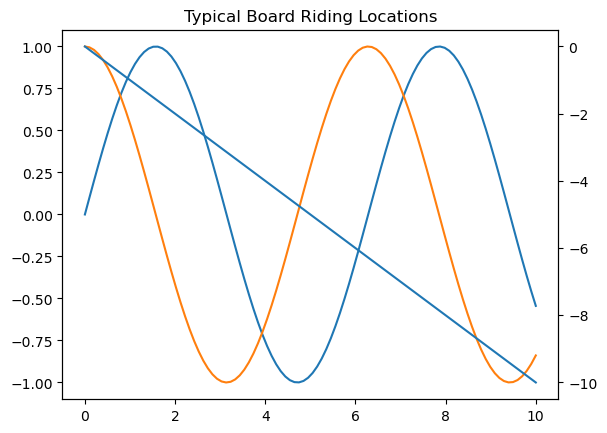

In [43]:
# We can do use the MATLAB style to quickly plot two series on a single chart

x = np.linspace(0, 10, 100)  # create our set of x values to use

plt.plot(x, np.sin(x)) # plot a simple function
plt.plot(x, np.cos(x)) # plot another simple function on the same y axis

plt.twinx() # Here is the method that creates the second y axis
plt.plot(x, -1 * x) # Now plot a simple function on the new y-axis

plt.title('Typical Board Riding Locations'); # add a title to the subplot


The above lets us very quickly make our dual axis diagram. Usually we want to do more with the labelling and alignment. This can be done using the MATLAB style but by switching to the Object-Oriented approach, we get more control.

Lets do the same thing again

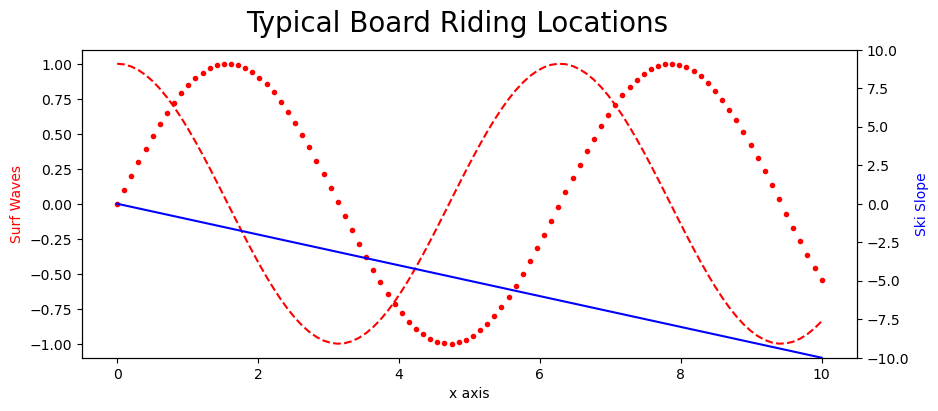

In [41]:
x = np.linspace(0, 10, 100)
fig, ax1 = plt.subplots(figsize=(10,4)) # This time we create only one axes in our figure
plt.suptitle('Typical Board Riding Locations', fontsize=20)

ax1.set_xlabel('x axis') 

ax1.plot(x, np.sin(x), 'r.') # This time we specify the line type and color to know which line belongs to which axis
ax1.plot(x, np.cos(x), 'r--') # We can still show two lines on a single axis
ax1.set_ylabel('Surf Waves', color = 'red') # We move the labels to the axis

ax2 = ax1.twinx() # Here is the key function that creates the second axis for the ax2 plot
ax2.plot(x, -1 * x, 'b-')
ax2.set_ylabel('Ski Slope', color = 'blue') # We move the labels to the axis and give it the same color as the line

# If there is some negative values to be plotted we probably still want the two lines to share a common zero line.
# We can do some calculations to have equal space above and below the zero line to achieve this.
# If your data is all positive or all negative this can be done simply by setting either the top or bottom y_lim to zero.

# We know a sine wave is already symmetrical around zero so lets just align the right y-axis

max_ax2 = max(abs(-1 * x)) # get the absolute maximum of the values on the right axis
min_ax2 = -1 * max_ax2 # get the corresponding negative value

ax2.set_ylim(min_ax2, max_ax2);

### Test your understanding
Recreate the above chart using the MATLAB style code. Use the simple version as a starting point.

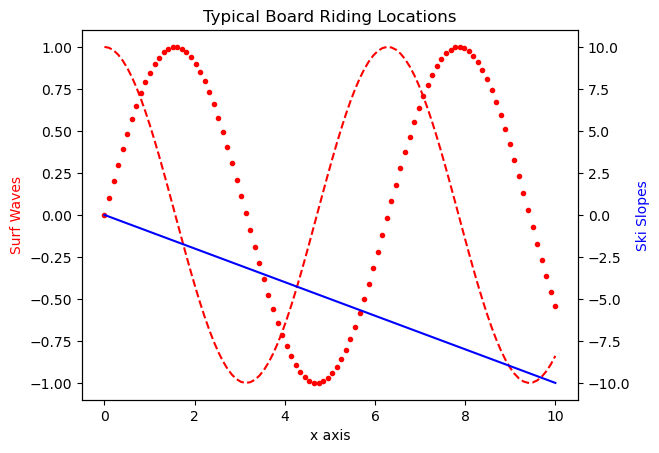

In [40]:
# SOLUTION

x = np.linspace(0, 10, 100)  # create our set of x values to use
plt.title('Typical Board Riding Locations') # add a title to the subplot

# left axis plot
plt.plot(x, np.sin(x), 'r.') # plot a simple function
plt.plot(x, np.cos(x), 'r--') # plot another simple function on the same y axis
plt.ylabel('Surf Waves', color='red')
plt.xlabel('x axis')
# right axis plot
plt.twinx() # Here is the method that creates the second y axis
plt.plot(x, -1 * x, 'b') # Now plot a simple function on the new y-axis
plt.ylabel('Ski Slopes', color='blue')
plt.ylim(-11, 11); # set the axis symmetrically around 0

